In [260]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import numpy as np
from numpy import pi
import random
import matplotlib.pyplot as plt

In [261]:
# Init Qasm simulator backend
qasm = Aer.get_backend('qasm_simulator')
statevector_sim = Aer.get_backend("statevector_simulator")
backend_sim = qasm

In [262]:
def complex_cal(qc, statevector_sim):
    statevector_job = execute(qc, statevector_sim)
    statevector_result = statevector_job.result()
    psi = statevector_result.get_statevector()
    z0 = psi[0]
    z1 = psi[1]
    if z1.real != 0 or z1.imag != 0:
        z = z0/z1
        z = round(z.real, 2) + round(z.imag, 2) * 1j
    else:
        z = 0
    return z

init_q = QuantumRegister(1, 'q')
qc_cercle = QuantumCircuit(init_q)

tab_cercle = [[], []]
x_cercle = []
y_cercle = []
tab_temp = []
z0 = 0+0j
z1 = 0+0j
z = 0+0j

shots = 100
max_shots = 1
qc_cercle.h(init_q)
for w in range(max_shots):
    # First part
    for i in range(shots):
        qc_cercle.rz(pi/(shots/8), init_q)
        z = complex_cal(qc_cercle, statevector_sim)
        if z != 0:
            tab_temp.append(z)
    qc_cercle.barrier()
    
    if (w + 1) % 5 == 0:
        print("Full circuit bloch :", w+1, "/", max_shots)

print("Fini!")

for i in tab_temp:
    iteration = tab_temp.count(i)
    if tab_cercle[0].count(i) < 1:
        tab_cercle[0].append(i)
        tab_cercle[1].append(iteration)

for i in range(len(tab_cercle[0])):
    x_cercle.append(tab_cercle[0][i].real)
    y_cercle.append(tab_cercle[0][i].imag)

print("Total of SV :", len(tab_temp))
    
#qc.draw()

Fini!
Total of SV : 100


In [263]:
def complex_cal(qc, statevector_sim):
    statevector_job = execute(qc, statevector_sim)
    statevector_result = statevector_job.result()
    psi = statevector_result.get_statevector()
    z0 = psi[0]
    z1 = psi[1]
    if z1.real != 0 or z1.imag != 0:
        z = z0/z1
        z = round(z.real, 2) + round(z.imag, 2) * 1j
        if np.abs(z0.real) >= 1.0 / np.sqrt(2):
            z_north = z0/z1
            z_north = round(z_north.real, 2) + round(z_north.imag, 2) * 1j
            z_south = 0
            return z, z_north, z_south
        if np.abs(z0.real) <= 1.0 / np.sqrt(2):
            z_south = z0/z1
            z_south = round(z_south.real, 2) + round(z_south.imag, 2) * 1j
            z_north = 0
            return z, z_north, z_south
    else:
        z = 0
        z_north = 0
        z_south = 0
    return z, z_north, z_south

init_q = QuantumRegister(1, 'q')
qc = QuantumCircuit(init_q)

tab = [[], []]
x = []
y = []
x_north = []
y_north = []
x_south = []
y_south = []
tab_temp = [[], [], []]
z0 = 0+0j
z1 = 0+0j
z = 0+0j
z_north = 0*0j
z_south = 0*0j

shots = 100
max_shots = 100

print("Launch!")
qc.h(init_q)
for w in range(max_shots):
    for i in range(shots):
        qc.rx(-pi/(shots-i), init_q)
        qc.rz(pi/(shots/8), init_q)
        #qc.u(pi/(shots-i), pi/(shots/8), 0, init_q)
        z, z_north, z_south = complex_cal(qc, statevector_sim)
        if z != 0:
            if z_north != 0:
                tab_temp[0].append(z)
                tab_temp[1].append(z_north)
            if z_south != 0:
                tab_temp[0].append(z)
                tab_temp[2].append(z_south)
    qc.barrier()
    
    if (w + 1) % 5 == 0:
        print("Full circuit bloch :", w+1, "/", max_shots)

print("Fini!")

for i in tab_temp[0]:
    iteration = tab_temp[0].count(i)
    if tab[0].count(i) < 1:
        tab[0].append(i)
        tab[1].append(iteration)

# the whole world
for i in range(len(tab[0])):
    x.append(tab[0][i].real)
    y.append(tab[0][i].imag)
# northern hemisphere
for i in range(len(tab_temp[1])):
    x_north.append(tab_temp[1][i].real)
    y_north.append(tab_temp[1][i].imag)
# southern hemisphere
for i in range(len(tab_temp[2])):
    x_south.append(tab_temp[2][i].real)
    y_south.append(tab_temp[2][i].imag)

print("Total of SV :", len(tab_temp[0]))
    
#qc.draw()

Launch!
Full circuit bloch : 5 / 100
Full circuit bloch : 10 / 100
Full circuit bloch : 15 / 100
Full circuit bloch : 20 / 100
Full circuit bloch : 25 / 100
Full circuit bloch : 30 / 100
Full circuit bloch : 35 / 100
Full circuit bloch : 40 / 100
Full circuit bloch : 45 / 100
Full circuit bloch : 50 / 100
Full circuit bloch : 55 / 100
Full circuit bloch : 60 / 100
Full circuit bloch : 65 / 100
Full circuit bloch : 70 / 100
Full circuit bloch : 75 / 100
Full circuit bloch : 80 / 100
Full circuit bloch : 85 / 100
Full circuit bloch : 90 / 100
Full circuit bloch : 95 / 100
Full circuit bloch : 100 / 100
Fini!
Total of SV : 9998


Number of different value :  8353


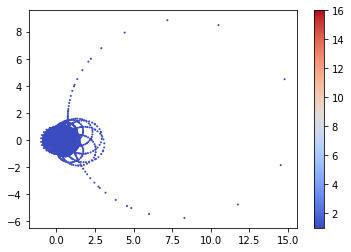

In [285]:
plt.scatter(x_cercle, y_cercle, c=tab_cercle[1], s=1, cmap="coolwarm")
plt.scatter(x, y, c=tab[1], s=1, cmap="coolwarm")
plt.colorbar()
print("Number of different value : ", len(x))

North hemi
Number of different values in zoom :  269 / 864


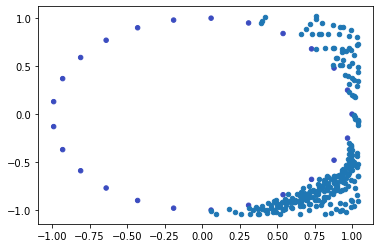

In [265]:
print("North hemi")
gen_tab = [[], []]
zoom_in = 1.05

for i in range(len(x_north)):
    if (x_north[i] > -zoom_in and x_north[i] < zoom_in) and (y_north[i] > -zoom_in and y_north[i] < zoom_in):
        gen_tab[0].append(x_north[i])
        gen_tab[1].append(y_north[i])
plt.scatter(x_cercle, y_cercle, c=tab_cercle[1], s=20, cmap="coolwarm")
plt.scatter(gen_tab[0], gen_tab[1], s=20)
print("Number of different values in zoom : ", len(gen_tab[0]), "/", len(x_north))

South hemi
Number of different values in zoom :  8928 / 9134


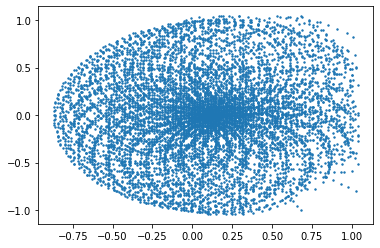

In [283]:
print("South hemi")
gen_tab = [[], []]
zoom_in = 1.05

for i in range(len(x_south)):
    if (x_south[i] > -zoom_in and x_south[i] < zoom_in) and (y_south[i] > -zoom_in and y_south[i] < zoom_in):
        gen_tab[0].append(x_south[i])
        gen_tab[1].append(y_south[i])
#plt.scatter(x_cercle, y_cercle, c=tab_cercle[1], s=2, cmap="coolwarm")
plt.scatter(gen_tab[0], gen_tab[1], s=2)
print("Number of different values in zoom : ", len(gen_tab[0]), "/", len(x_south))

The whole world !
Number of different values in zoom :  8017 / 8353


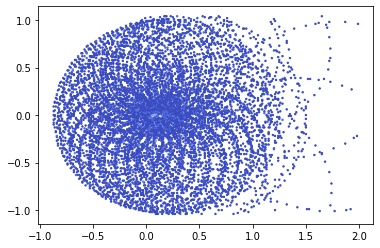

In [288]:
print("The whole world !")
gen_tab = [[], [], []]
zoom_in = 4

for i in range(len(x)):
    if (x[i] > -1.05 and x[i] < 2) and (y[i] > -1.05 and y[i] < 1.05):
        gen_tab[0].append(x[i])
        gen_tab[1].append(y[i])
        gen_tab[2].append(tab[1][i])

#plt.scatter(x_cercle, y_cercle, c=tab_cercle[1], s=2, cmap="coolwarm")
plt.scatter(gen_tab[0], gen_tab[1], c=gen_tab[2], s=2, cmap="coolwarm")
#plt.colorbar()
print("Number of different values in zoom : ", len(gen_tab[0]), "/", len(x))